# Simple Block Phantoms Example

Example of generating a simple phantom with user specified tissue parameters, and range of alpha flip angles for each slice.

In [2]:
import os
import sys
# Go up one level from the notebooks directory to reach project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)  # Insert at beginning of path to take precedence

import numpy as np
import matplotlib.pyplot as plt
import mssfp
from mssfp.phantoms import simple, phantom, shepp_logan

In [3]:
tissue_parameters = {
    0: ('none', 0, 0, 0),
    1: ('fat', 0.350, 0.130, 0),
    2: ('bone marrow', 0.370, 0.05, 0),
    3: ('liver', 0.8, 0.04, 0),
    4: ('white matter', 1.0, 0.08, 0),
    5: ('myocardium', 1.150, 0.045, 0),
    6: ('vessels', 1.2, 0.05, 0),   
    7: ('gray matter', 1.3, 0.110, 0),
    8: ('muscle', 1.4, 0.030, 0),
    9: ('CSF', 4.0, 1.0, 0)
}

Generating phantom...
Generating SSFP dataset...
Dataset complete.
Dataset shape: (2, 256, 256, 4)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
(2, 256, 256, 4)


c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:65: RuntimeWarning: divide by zero encountered in divide
  E1 = np.where(T1 > 0, np.exp(-TR / T1), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:66: RuntimeWarning: divide by zero encountered in divide
  E2 = np.where(T2 > 0, np.exp(-TR / T2), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:92: RuntimeWarning: divide by zero encountered in divide
  T2_decay = np.where(T2 > 0, np.exp(-TE / T2), 0)


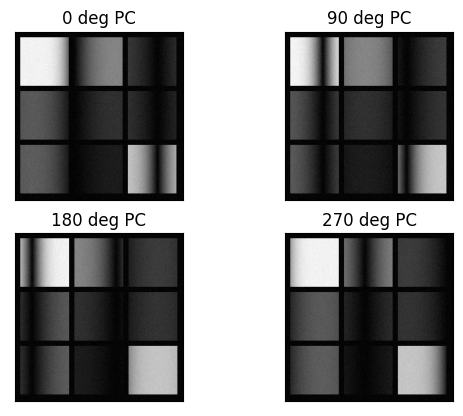

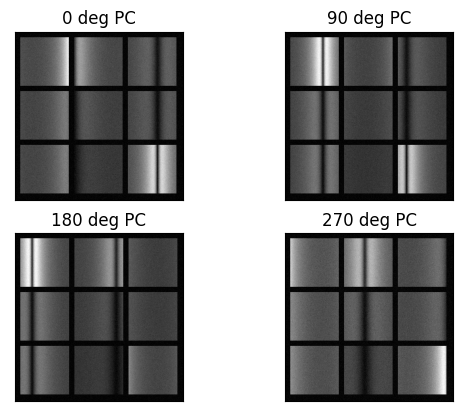

In [4]:
N = 256
alphas = np.deg2rad([60, 10])
slices = len(alphas)
alphas = alphas[:, np.newaxis, np.newaxis]
dataset = phantom.generate_ssfp_dataset(phantom_type='block', slices=slices, shape=N, ids=[1, 2, 3, 4, 5, 6, 7, 8, 9], tissues=tissue_parameters, padding=8, f=100, df=1/3e-3, alpha = alphas)

print(np.unique(dataset['seg']))
print(dataset['M'].shape)
mssfp.plot_dataset(dataset['M'], slice=0)
mssfp.plot_dataset(dataset['M'], slice=1)

In [17]:
N = 256
slices = 200
alphas = np.deg2rad(np.linspace(1, 60, slices))
alphas = alphas[:, np.newaxis, np.newaxis]
dataset = phantom.generate_ssfp_dataset(phantom_type='block', slices=slices, shape=N, ids=[1, 2, 3, 4, 5, 6, 7, 8, 9], tissues=tissue_parameters, padding=8, f=100, df=1/3e-3, alpha = alphas)

Generating phantom...
Generating SSFP dataset...


c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:65: RuntimeWarning: divide by zero encountered in divide
  E1 = np.where(T1 > 0, np.exp(-TR / T1), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:66: RuntimeWarning: divide by zero encountered in divide
  E2 = np.where(T2 > 0, np.exp(-TR / T2), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:92: RuntimeWarning: divide by zero encountered in divide
  T2_decay = np.where(T2 > 0, np.exp(-TE / T2), 0)


Dataset complete.
Dataset shape: (200, 256, 256, 4)


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
(200, 256, 256, 4)


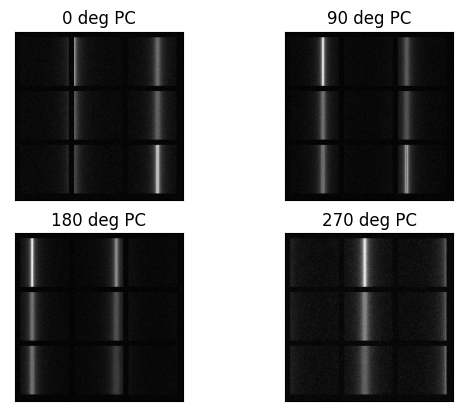

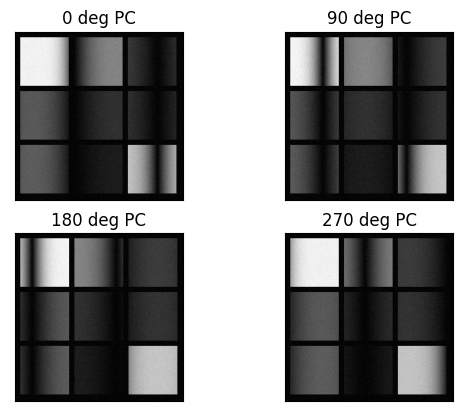

In [18]:
print(np.unique(dataset['seg']))
print(dataset['M'].shape)
mssfp.plot_dataset(dataset['M'], slice=0)
mssfp.plot_dataset(dataset['M'], slice=199)

(200, 256)


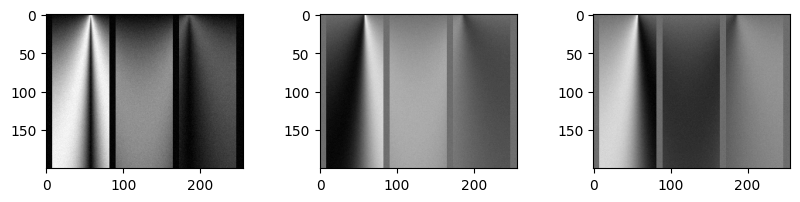

In [ ]:
Mslice = dataset['M'][:,20,:,1]
print(Mslice.shape)

plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
plt.imshow(np.abs(Mslice))
plt.subplot(1,3,2)
plt.imshow(Mslice.real)
plt.subplot(1,3,3)
plt.imshow(Mslice.imag)
plt.show()

In [35]:
N = 256
slices = 4
alphas = np.deg2rad(np.linspace(60, 60, slices))
alphas = alphas[:, np.newaxis, np.newaxis]
import math
dataset = phantom.generate_ssfp_dataset(phantom_type='block', slices=slices, shape=N, ids=[1, 2, 3, 4, 5, 6, 7, 8, 9], tissues=tissue_parameters, padding=8, f=100, df=1/3e-3, alpha = alphas,
                                        fn_offset=100, useRotate=True, useDeform=True, rotation=90)

Generating phantom...
Generating SSFP dataset...
Dataset complete.
Dataset shape: (4, 256, 256, 4)


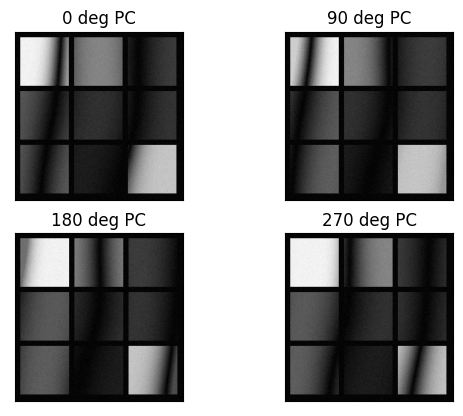

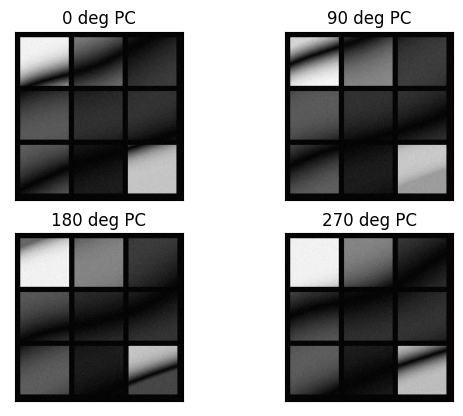

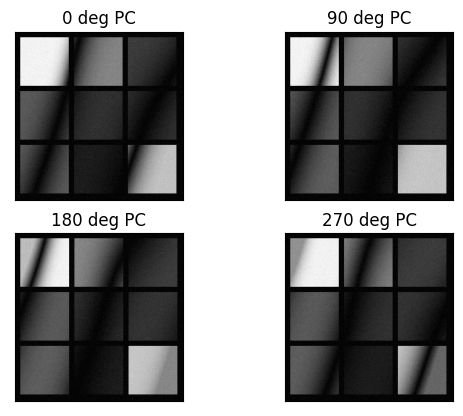

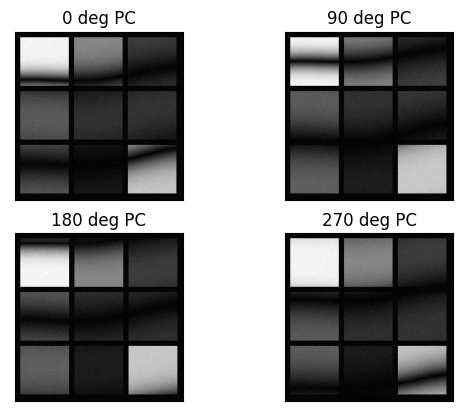

In [36]:
mssfp.plot_dataset(dataset['M'], slice=0)
mssfp.plot_dataset(dataset['M'], slice=1)
mssfp.plot_dataset(dataset['M'], slice=2)
mssfp.plot_dataset(dataset['M'], slice=3)